In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append("../..")

In [5]:
from encoding.parse_rooms import parse_rooms, parse_exits, dictify_rooms

In [7]:
rooms = parse_rooms("../../encoding/dsl/rooms_for_alloy.txt")
exits = parse_exits("../../encoding/dsl/exits_for_alloy.txt")
design = dictify_rooms(rooms, exits)

In [9]:
from rom_tools.rom_manager import RomManager
from abstraction_validation.sm_paths import *

In [11]:
rom = RomManager("../../../roms/sm_clean.sfc", "sm_junk.smc")
parsed_rom = rom.parse()

In [12]:
all_posns = all_positions(rooms, parsed_rom, is_global=False)

West_Ocean 0x793fe
	 Extra: ['West_Ocean_R4', 'West_Ocean_L']
	 Missing: []
Bomb_Torizo 0x79804
	 Extra: ['Bomb_Torizo_B']
	 Missing: []


In [33]:
from abstraction_validation.abstractify import area_offsets, area_offset_key

In [4]:
# Load the map data from Super Metroid from ROM

In [20]:
from world_rando.coord import Rect

In [73]:
map_area_offsets = {
0: Coord(3, 10),
1: Coord(0, 28),
2: Coord(31, 48),
3: Coord(37, 0),
4: Coord(28, 28),
5: Coord(0, 11),
#Out of bounds
6: Coord(0, -10),
7: Coord(0, 0),
}

In [88]:
special_offsets = {
    "Crateria_Maridia_Shaft": Coord(7,0),
    "East_Ocean": Coord(7,0),
    "Forgotten_Highway": Coord(7,0),
    "Crab_Maze": Coord(7,0),
    "Crateria_Power_Door": Coord(7,0),
}

In [89]:
room_rects = {}
room_areas = {}
for room in rooms.values():
    header = parsed_rom[f"room_header_{hex(room.mem_address)}"]
    area_offset = map_area_offsets[header.area_index]
    if room.name in special_offsets:
        area_offset += special_offsets[room.name]
    map_pos = Coord(header.map_x, header.map_y)
    size = Coord(header.width, header.height)
    room_rects[room.name] = Rect(area_offset + map_pos, area_offset + map_pos + size)
    room_areas[room.name] = header.area_index

In [90]:
import matplotlib.patches

In [91]:
area_offsets

{0: c(3,10),
 1: c(0,29),
 2: c(31,49),
 3: c(37,0),
 4: c(28,29),
 5: c(0,10),
 6: c(0,-10),
 7: c(0,0)}

In [92]:
area_offset_key

{0: 'Crateria',
 1: 'Brinstar',
 2: 'Norfair',
 3: 'Wrecked_Ship',
 4: 'Maridia',
 5: 'Tourian',
 6: 'Ceres_Station',
 7: 'Debug'}

In [93]:
area_colors = {
    0 : "mediumaquamarine",
    1 : "salmon",
    2 : "firebrick",
    3 : "olivedrab",
    4 : "royalblue",
    5 : "hotpink",
    6 : "grey",
    7 : "yellow",
}

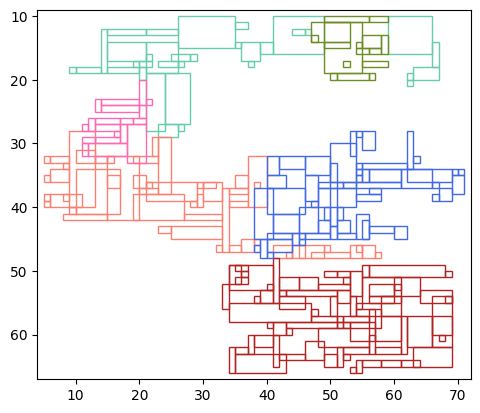

In [95]:
fig, ax = plt.subplots()
xlim(4,72)
ylim(9,67)
plt.gca().set_aspect("equal")
plt.gca().invert_yaxis()
for room in rooms.values():
    rect = room_rects[room.name]
    area = room_areas[room.name]
    rsize = rect.end - rect.start
    r = matplotlib.patches.Rectangle(rect.start, rsize.x, rsize.y, linewidth=1, edgecolor=area_colors[area], facecolor='none')
    ax.add_patch(r)
plt.show()

In [ ]:
# Parsing the map data?

In [ ]:
# Since there is a fair amount of region (and even room) overlap, we'll need to define state using both position and region